In [1]:
import pandas as pd
import numpy as np
import datetime
from getting_started import *
import detect_duplicates_script as script_dd
import get_final_dataset as script_fds
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_final = script_fds.get_final_ds(df_patient, df_pcr)
#
df_final[:3]

,patient_id,pcr,postcode,state,date_of_birth,age
0,653091,0,4514,QLD,1973-04-26,47.0
1,347667,0,4551,QLD,1990-03-16,30.0
2,708481,1,3199,VIC,1943-03-17,77.0


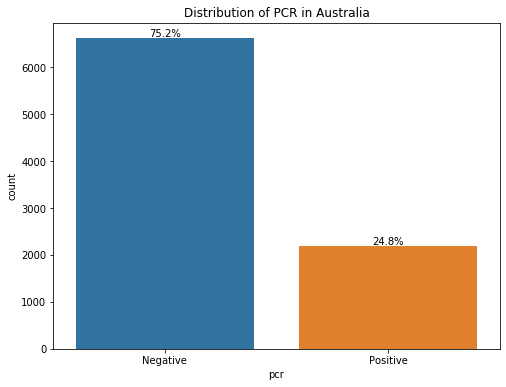

In [3]:
plt.figure(figsize=(8,6))

plt.title('Distribution of PCR in Australia')
plt.xlabel('pcr')
plt.ylabel('Count')

df_final_pcr = df_final[['pcr']]
ncount = len(df_final_pcr)
labels = ['Negative', 'Positive']
ax = sns.countplot(x="pcr", data=df_final_pcr)
ax.set_xticklabels(labels, rotation='horizontal', fontsize=10)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

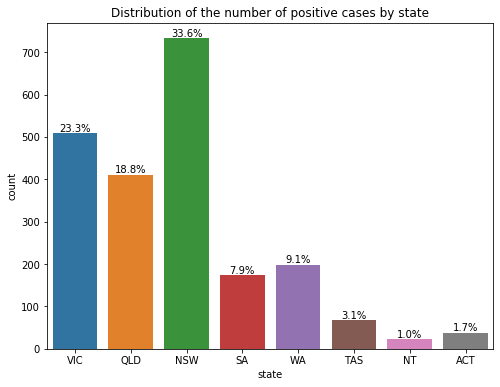

In [13]:
plt.figure(figsize=(8,6))

plt.title('Distribution of the number of positive cases by state')
plt.xlabel('pcr')
plt.ylabel('Count')

df_positive_state = df_final[['state']][df_final['pcr'] == 1]
ncount = len(df_positive_state)

ax = sns.countplot(x="state", data=df_positive_state)
#ax.set_xticklabels(labels, rotation='horizontal', fontsize=10)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

In [14]:
#plt.figure(figsize=(12,8))

#plt.title('Distribution of PCR in Australia s states')
#plt.xlabel('pcr')
#plt.ylabel('Count')

#df_count_state_pcr = df_final[['state', 'pcr']]
#df_count_state_pcr['pcr'].replace(to_replace =0, 
                          #        value ="Negative",
                           #      inplace=True) 
#df_count_state_pcr['pcr'].replace(to_replace = 1, 
                              #    value ="Positive",
                               #  inplace=True) 

#ax = sns.countplot(x="state", hue="pcr", data=df_count_state_pcr)
#total = len(df_count_state_pcr)
#for p in ax.patches:
#    percentage = f'{100 * p.get_height() / total:.1f}%\n'
#    x = p.get_x() + p.get_width() / 2
#    y = p.get_height()
#    ax.annotate(percentage, (x, y), ha='center', va='center')

C:\Users\y_elk\anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


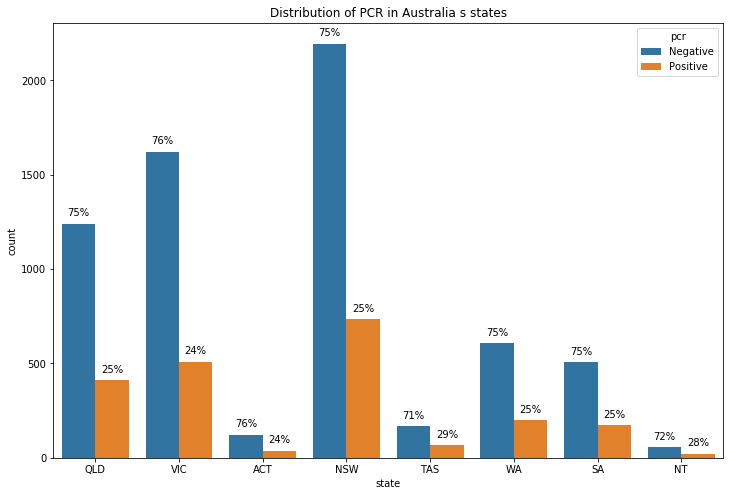

In [15]:
plt.figure(figsize=(12,8))

plt.title('Distribution of PCR in Australia s states')
plt.xlabel('pcr')
plt.ylabel('Count')

df_count_state_pcr = df_final[['state', 'pcr']]
df_count_state_pcr['pcr'].replace(to_replace =0, 
                                  value ="Negative",
                                 inplace=True) 
df_count_state_pcr['pcr'].replace(to_replace = 1, 
                                  value ="Positive",
                                 inplace=True) 

ax = sns.countplot(x="state", hue="pcr", data=df_count_state_pcr)

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

In [ ]:
#df_final_pcr = df_final[['pcr']]

#labels = ['Negative', 'Positive'];
#graph = sns.catplot(x="pcr", 
 #           kind="count",
            #palette="ch:.25", 
 #           data=df_final_pcr)
#graph.set_axis_labels("PCR", "Count")
#graph.set_xticklabels(labels, rotation='horizontal', fontsize=10)

#graph
# Ajouter pourcentage !
#df_final_pcr[:10]

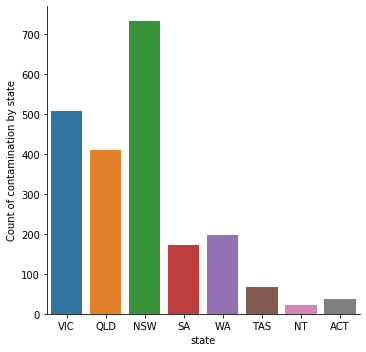

In [9]:
df_final_state = df_final[['state']][df_final['pcr'] == 1]

#labels = ['Negative', 'Positive'];
graph = sns.catplot(x="state", 
            kind="count",
            #palette="ch:.25", 
            data=df_final_state)
graph.set_axis_labels("state", "Count of contamination by state")
#graph.set_xticklabels(labels, rotation='horizontal', fontsize=10)
graph

In [ ]:
df_final_state_pcr = df_final[['state', 'pcr']]
# patient_id	pcr	postcode	state	date_of_birth	age
#labels = ['Negative', 'Positive'];
graph = sns.catplot(x="state", 
            kind="count",
            #palette="ch:.25", 
            data=df_final_state)
graph.set_axis_labels("state", "Count of contamination by state")
#graph.set_xticklabels(labels, rotation='horizontal', fontsize=10)
graph
graph = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)